In [39]:
#imports
from qiskit import*
from qiskit.tools.visualization import plot_bloch_multivector
import numpy as np
from numpy import linalg as LA
import random
from qiskit.extensions.simulator import snapshot
from matplotlib import pyplot as plt

In [8]:
#initialize state vector

def normalize(vector):
    return vector / LA.norm(vector)

def initialize( vector ):
    circuit.initialize(vector.tolist(),0)
    for i in range(1,5):
            circuit.initialize([1,0],i)


In [4]:
#encode
def encode():
    circuit.cx(0,1)
    circuit.cx(0,2)


In [34]:
#error
def error(error_prob):
    for i in range(3):
        if( abs(random.random()) < error_prob ):
            circuit.x(i)



In [6]:
#correction
def correct():
    circuit.cx(0,3)
    circuit.cx(1,3)

    circuit.cx(1,4)
    circuit.cx(2,4)
    
    syndrome = [circuit.measure(3,0),circuit.measure(4,1)]
    
    if(syndrome == [1,0]):
        circuit.x(0)
    elif(syndrome == [0,1]):
        circuit.x(2)
    elif(syndrome == [1,1]):
        circuit.x(1)    
    
    #decode
    circuit.cx(1,2)
    circuit.measure(2,0)
    circuit.cx(0,1)
    circuit.measure(1,0)
    circuit.snapshot("one_qubit", qubits=[0])
    


[0.9220550292189327, 0.8226518090498531, 0.757784346063283, 0.6377112031031917, 0.5412929105928497, 0.5524349682165964, 0.4232426931410857, 0.3769464793428971, 0.35468325766028586, 0.3822909361794488, 0.28221447787016757, 0.15812808892503288, 0.21937304744057967, 0.1594031203596051, 0.30939292180132727, 0.20200502147869212, 0.17165459156851423, 0.16930986708977694, 0.2504184712028135, 0.2528810234425484, 0.2690985819019546, 0.2718541033087304, 0.3526043513789787, 0.4448211833993828, 0.4397472348244391, 0.5085153989768112, 0.5815434154812484, 0.7479911601995377, 0.7688467757128993, 0.8593755212878207]


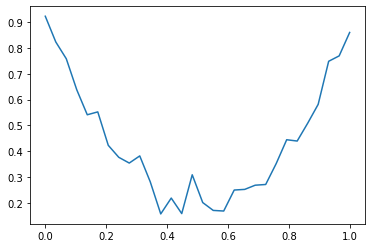

In [43]:

def run(circuit,error_prob):
        initial_state = [complex(random.random(),random.random()),complex(random.random(),random.random())]
        initial_state = normalize(initial_state)
        initialize(initial_state)
        encode()
        error(error_prob)
        correct()
        return initial_state

    
p = np.linspace(0,1,30)
fidelity_array = []
for k in p:
    fidelity = 0
    shots = 50
    circuit = QuantumCircuit(5,2,name="repitition_circ")
    for j in range(shots):
        circuit = QuantumCircuit(5,2,name="repitition_circ")
        initial_state = run(circuit,k)
        simulator = Aer.get_backend('statevector_simulator')
        job = execute(circuit,backend = simulator)
        result = job.result()
        snapshots = result.data()['snapshots']['statevector'].values()
        s = []
        for v in snapshots:
            for i in range(2):
                s.append(complex(v[0][i][0],v[0][i][1]))
        s = np.array(s)
        dot = abs(np.dot(initial_state,s))
        fidelity += dot
    fidelity = fidelity/shots
    fidelity_array.append(fidelity)
    
print(fidelity_array)
%matplotlib inline
plt.plot(p,np.array(fidelity_array))
